# 3.14 (Thurs) Crawling

* 웹 사이트 주소 앞에 view-source: 를 입력하면 웹사이트 뒷면(이면)의 소스를 볼 수 있음 / 웹 사이트는 html을 사용함. 
* < html >부터 < /html >까지가 덩어리, < head > 부터 < /head >까지가 덩어리 
* / 마크가 end를 보여줌
* 여는 태그 옆 속성을 붙여줌: 정보를 추가하는 것


<여는태그>내용</닫는태그>  
<여는태그 속성명="속성값">내용</닫는태그>  
<여는태그 속성명="속성값" /> : 자기 스스로 닫음

html: 전체 html 문서를 감싸는 태그입니다. 하나만 존재해야 하고 html 바깥에 DOCTYPE을 제외한 다른 태그가 있으면 안 됩니다.  
head: html 문서에 대한 정보를 나타내는 부분입니다. 하나만 존재해야하고, html 바로 아래에 있어야합니다.  
body: html 문서에서 실제적으로 보여지는 부분을 나타냅니다. 하나만 존재해야 하고, html 바로 아래, head 다음에 위치해야 합니다.  
title: head 안에 들어가는 태그로 제목표시줄의 내용을 나타냅니다.  
meta: 문서에 대한 설명을 표시합니다. 사람에게는 보이지 않고, 브라우저만 읽을 수 있습니다. 속성으로 charset="utf-8"이라고 한 것은 브라우저에게 한글인코딩을 UTF-8로 설정하라고 알린 겁니다. 이 부분이 있어야 한글이 깨지지 않습니다.  
h1: body 안에서 제목을 표시하는 태그입니다. 중요도에 따라 h1부터 h2, h3, ..., h6까지 있습니다.  
div: 구역을 표시하는 태그입니다. 눈에 보이지는 않지만 p와 img 태그를 하나의 구역으로 묶었습니다.  
p: 문단을 표시하는 태그입니다. 여기 안에 글의 내용을 넣으면 됩니다.  
img: 이미지를 표시하는 태그입니다. 아까 src라는 속성이 있었는데 src는 이미지 파일의 경로(위치)를 지정하는 속성입니다.  
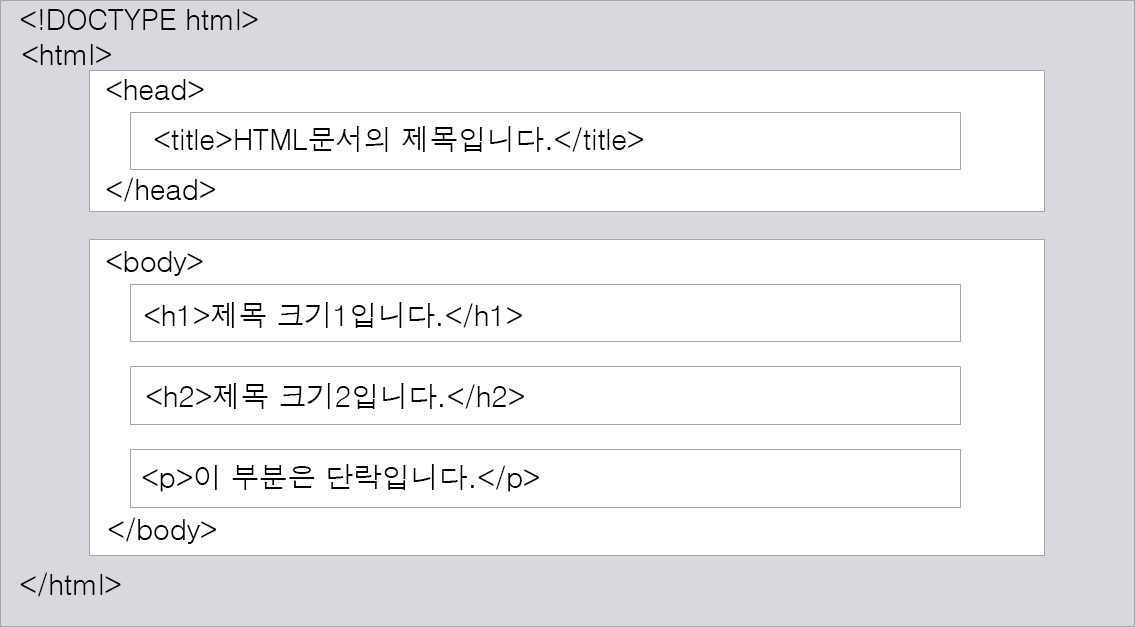

#### - from ~ import A: 메모리를 아끼는 방법. 폴더 속에 있는 특정한 것(A)만을 import할 수 있게 해줌.  

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv

In [2]:
html = urlopen("http://www.naver.com")
html

## 웹문서 전체를 가져오기

* variable뒤에 특정한 것을 적으면 그것만 가져옴  
  ex) bsObject.html (html부분을 가져오라), bsObject.head (head부분을 가져오라), ,bsObject.head.title (head안의 title부분을 가져오라) 등..

In [3]:
bsObject = BeautifulSoup(html, "html.parser")
bsObject.html

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="origin" name="Referrer"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1100" name="viewport"/>
<meta content="NAVER" name="apple-mobile-web-app-title">
<meta content="index,nofollow" name="robots">
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
<meta content="네이버" property="og:title"/>
<meta content="https://www.naver.com/" property="og:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
<meta content="summary" name="twitter:card"/>
<meta content="" name="twitter:title"/>
<meta content="https://www.naver.com/" name="twitter:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mob

## head 가져오기

In [4]:
bsObject.head

<head>
<meta charset="utf-8"/>
<meta content="origin" name="Referrer"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1100" name="viewport"/>
<meta content="NAVER" name="apple-mobile-web-app-title">
<meta content="index,nofollow" name="robots">
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
<meta content="네이버" property="og:title"/>
<meta content="https://www.naver.com/" property="og:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
<meta content="summary" name="twitter:card"/>
<meta content="" name="twitter:title"/>
<meta content="https://www.naver.com/" name="twitter:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.

## title 가져오기

In [5]:
bsObject.head.title

<title>NAVER</title>

In [6]:
bsObject.head.title.get_text()  # bsObject.head.title.text.strip()

'NAVER'

## meta 데이터 가져오기

In [7]:
bsObject.head.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="origin" name="Referrer"/>,
 <meta content="text/javascript" http-equiv="Content-Script-Type"/>,
 <meta content="text/css" http-equiv="Content-Style-Type"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <meta content="width=1100" name="viewport"/>,
 <meta content="NAVER" name="apple-mobile-web-app-title">
 <meta content="index,nofollow" name="robots">
 <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
 <meta content="네이버" property="og:title"/>
 <meta content="https://www.naver.com/" property="og:url"/>
 <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
 <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
 <meta content="summary" name="twitter:card"/>
 <meta content="" name="twitter:title"/>
 <meta content="https://www.naver.com/" name="twitter:url"/>
 <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobi

## meta 데이터의 모든 content 가져오기

In [8]:
for meta in bsObject.head.find_all('meta'):
    print(meta.get('content'))

None
origin
text/javascript
text/css
IE=edge
width=1100
NAVER
index,nofollow
네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요
네이버
https://www.naver.com/
https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png
네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요
summary

https://www.naver.com/
https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png
네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요


## meta 데이터 중 원하는 tag 가져오기

In [9]:
bsObject.head.find("meta", {"name":"description"})

<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
<meta content="네이버" property="og:title"/>
<meta content="https://www.naver.com/" property="og:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
<meta content="summary" name="twitter:card"/>
<meta content="" name="twitter:title"/>
<meta content="https://www.naver.com/" name="twitter:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:description">
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://pm.pstatic.net/css/main_v190219.css" rel="stylesheet" type="text/css"/>
<link href="https://pm.pstatic.net/css/webfont_v170623.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/sstat

In [10]:
bsObject.head.find("meta", {"name":"description"}).get('content')

'네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요'

In [11]:
bsObject.head.find("meta", {"content":"네이버"}).get('property')

'og:title'

## 모든 링크의 텍스트와 주소 가져오기

In [12]:
for link in bsObject.find_all('a'):
    print(link.text.strip(), link.get('href'))

연합뉴스 바로가기 #news_cast
주제별캐스트 바로가기 #themecast
타임스퀘어 바로가기 #time_square
쇼핑캐스트 바로가기 #shp_cst
로그인 바로가기 #account
네이버를 시작페이지로 http://help.naver.com/support/alias/contents2/naverhome/naverhome_1.naver
쥬니어네이버 http://jr.naver.com
해피빈 http://happybean.naver.com/main/SectionMain.nhn
자동완성 펼치기 javascript:;
한글 입력기 javascript:;
도움말 보기 https://help.naver.com/support/contents/contents.nhn?serviceNo=606&categoryNo=16658
ON선택됨 #
OFF #
로그인 https://nid.naver.com/nidlogin.login
자세히 https://help.naver.com/support/alias/search/word/word_16.naver
자세히 https://help.naver.com/support/contents/contents.nhn?serviceNo=606&categoryNo=16659
도움말 https://help.naver.com/support/service/main.nhn?serviceNo=606&categoryNo=1987
신고 https://help.naver.com/support/contents/contents.nhn?serviceNo=605&categoryNo=18215
검색어저장 켜기 javascript:;
자동완성 끄기 javascript:;
도움말 https://help.naver.com/support/service/main.nhn?serviceNo=606&categoryNo=1987
신고 https://help.naver.com/support/contents/contents.nhn?serviceNo=605&categoryNo=18215
검색어저장

In [13]:
# Create a file to write to, add headers row
f = csv.writer(open('crawling.csv', 'w'))
f.writerow(['Name', 'Link'])

for link in bsObject.find_all('a'):
    names = link.text.strip()
    links = link.get('href')

    f.writerow([names, links])

## 예제: 네이버 베스트셀러 주간 순위에 있는 책의 정보를 가져오기
첫페이지에 있는 25권의 책목록에서 링크를 추출하여 각 추출된 링크로 접속하여 책이름, 저자, 가격 정보등을 출력

In [14]:
html = urlopen('https://book.naver.com/bestsell/bestseller_list.nhn')
bsObject = BeautifulSoup(html, "html.parser")

In [15]:
bsObject

<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>
종합, YES24, 베스트셀러 : 네이버 책</title>
<meta content="article" property="og:type"/>
<meta content="네이버 책: 베스트셀러" property="og:title"/>
<meta content="http://book.naver.com/bestsell/bestseller_list.nhn" property="og:url"/>
<meta content="https://ssl.pstatic.net/static/m/book/icons/book_og_270x270.png" property="og:image"/>
<meta content="책으로 만나는 새로운 세상" property="og:description"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버 책" property="og:article:author"/>
<meta content="https://book.naver.com" property="og:article:author:url"/>
<link href="http://www.naver.com/favicon.ico?book" rel="shortcut icon" type="image/x-icon"/>
<script type="text/javascript">
var __bLogin = false;
var __bAdult = false;
</script>
<link href="/css/release/base_20190221082258.css" rel="stylesheet" type="text/css"/>
<scri

In [16]:
for n in range(0,25):

    dt = bsObject.find("dt", {"id":"book_title_"+str(n)})
    title = dt.select('a')[0].get_text()
    publisher = dt.next_sibling.next_sibling.get_text().split()[-1]
    author = dt.next_sibling.next_sibling.select('a')[0].get_text()

#    url = dt.select('a')[0].get('href')    
#    html = urlopen(url)
#    bsObject_sub = BeautifulSoup(html, "html.parser")
#    author = bsObject_sub.find('dt', text='저자').find_next_siblings('dd')[0].text.strip()

    print(n+1, title, author, publisher)

1 공부머리 독서법  최승필 책구루
2 고요할수록 밝아지는 것들  혜민 수오서재
3 철학은 어떻게 삶의 무기가 되는가  야마구치 슈 다산초당
4 원피스 91  오다 에이치로 대원씨아이
5 우린 너무 몰랐다  김용옥 통나무
6 댄 애리얼리 부의 감각  댄 애리얼리 청림출판
7 설민석의 한국사 대모험 9  설민석 아이휴먼
8 에어프라이어 만능 레시피북  강지현 엔트리
9 꽃을 보듯 너를 본다  나태주 지혜
10 12가지 인생의 법칙  조던 B. 피터슨 메이븐
11 나는 나로 살기로 했다  김수현 마음의숲
12 돌이킬 수 없는 약속  야쿠마루 가쿠 북플라자
13 수미네 반찬  김수미 성안당
14 6개월에 천만 원 모으기  이대표 한국경제신문
15 마력의 태동  히가시노 게이고 현대문학
16 마법천자문 44  김현수 아울북
17 당신이 옳다  정혜신 해냄출판사
18 ETS 토익 정기시험 기출문제집 1000 READING  ETS YBM
19 ETS 토익 정기시험 기출문제집 1000 LISTENING  ETS YBM
20 해커스 토익 기출 보카  David Cho 해커스어학연구소
21 나는 습관을 조금 바꾸기로 했다  사사키 후미오 쌤앤파커스
22 아이를 위한 하루 한 줄 인문학  김종원 청림라이프
23 초등 자존감의 힘  김선호 길벗
24 104층 나무 집  앤디 그리피스 시공주니어
25 나츠메 우인장 23  유키 미도리카와 학산문화사


-------------------------------------------------------------------------------------------------------

## Practice

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv

In [3]:
h = urlopen("http://www.daum.net")
h

In [4]:
bsObject = BeautifulSoup(h, "html.parser")
bsObject.html

<html class="" lang="ko">
<head>
<meta charset="utf-8"/>
<title>Daum</title>
<meta content="https://www.daum.net/" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="Daum" property="og:title"/>
<meta content="//i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001" property="og:image"/>
<meta content="나의 관심 콘텐츠를 가장 즐겁게 볼 수 있는 Daum" property="og:description"/>
<meta content="name=Daum;action-uri=https://www.daum.net/;icon-uri=/favicon.ico" name="msapplication-task"/>
<meta content="name=미디어다음;action-uri=http://media.daum.net/;icon-uri=/media_favicon.ico" name="msapplication-task"/>
<meta content="name=메일;action-uri=http://mail.daum.net;icon-uri=/mail_favicon.ico" name="msapplication-task"/>
<meta content="origin" name="referrer"/>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="다음" type="application/opensearchdescription+xml"/>
<style type="text/css">
@charset "utf-8";
body,div,dl,dt,dd,ul,ol,li,h1,h2,h3,h4,h5,h6,pre,code,form,fieldse

In [5]:
bsObject.head

<head>
<meta charset="utf-8"/>
<title>Daum</title>
<meta content="https://www.daum.net/" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="Daum" property="og:title"/>
<meta content="//i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001" property="og:image"/>
<meta content="나의 관심 콘텐츠를 가장 즐겁게 볼 수 있는 Daum" property="og:description"/>
<meta content="name=Daum;action-uri=https://www.daum.net/;icon-uri=/favicon.ico" name="msapplication-task"/>
<meta content="name=미디어다음;action-uri=http://media.daum.net/;icon-uri=/media_favicon.ico" name="msapplication-task"/>
<meta content="name=메일;action-uri=http://mail.daum.net;icon-uri=/mail_favicon.ico" name="msapplication-task"/>
<meta content="origin" name="referrer"/>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="다음" type="application/opensearchdescription+xml"/>
<style type="text/css">
@charset "utf-8";
body,div,dl,dt,dd,ul,ol,li,h1,h2,h3,h4,h5,h6,pre,code,form,fieldset,legend,textarea,p,blockq